# Title: Which players have the highest engagement in the server? 

## Introduction


Background information: <br>
XXX XXX

Question: Can the age and played hours of specific players their subscription status to game newsletters in players.csv data? <br>

Dataset included: player.csv

In [1]:
library(tidyverse)
library(ggplot2)
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
#reading players file
players <- read.csv("data/players.csv")
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


#### Description about `players` dataset: <br>
XXX

In [6]:
summarize(players, 
          average_age = mean(Age, na.rm = TRUE), 
          average_played_hours = mean(played_hours, na.rm = TRUE))

average_age,average_played_hours
<dbl>,<dbl>
20.52062,5.845918


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


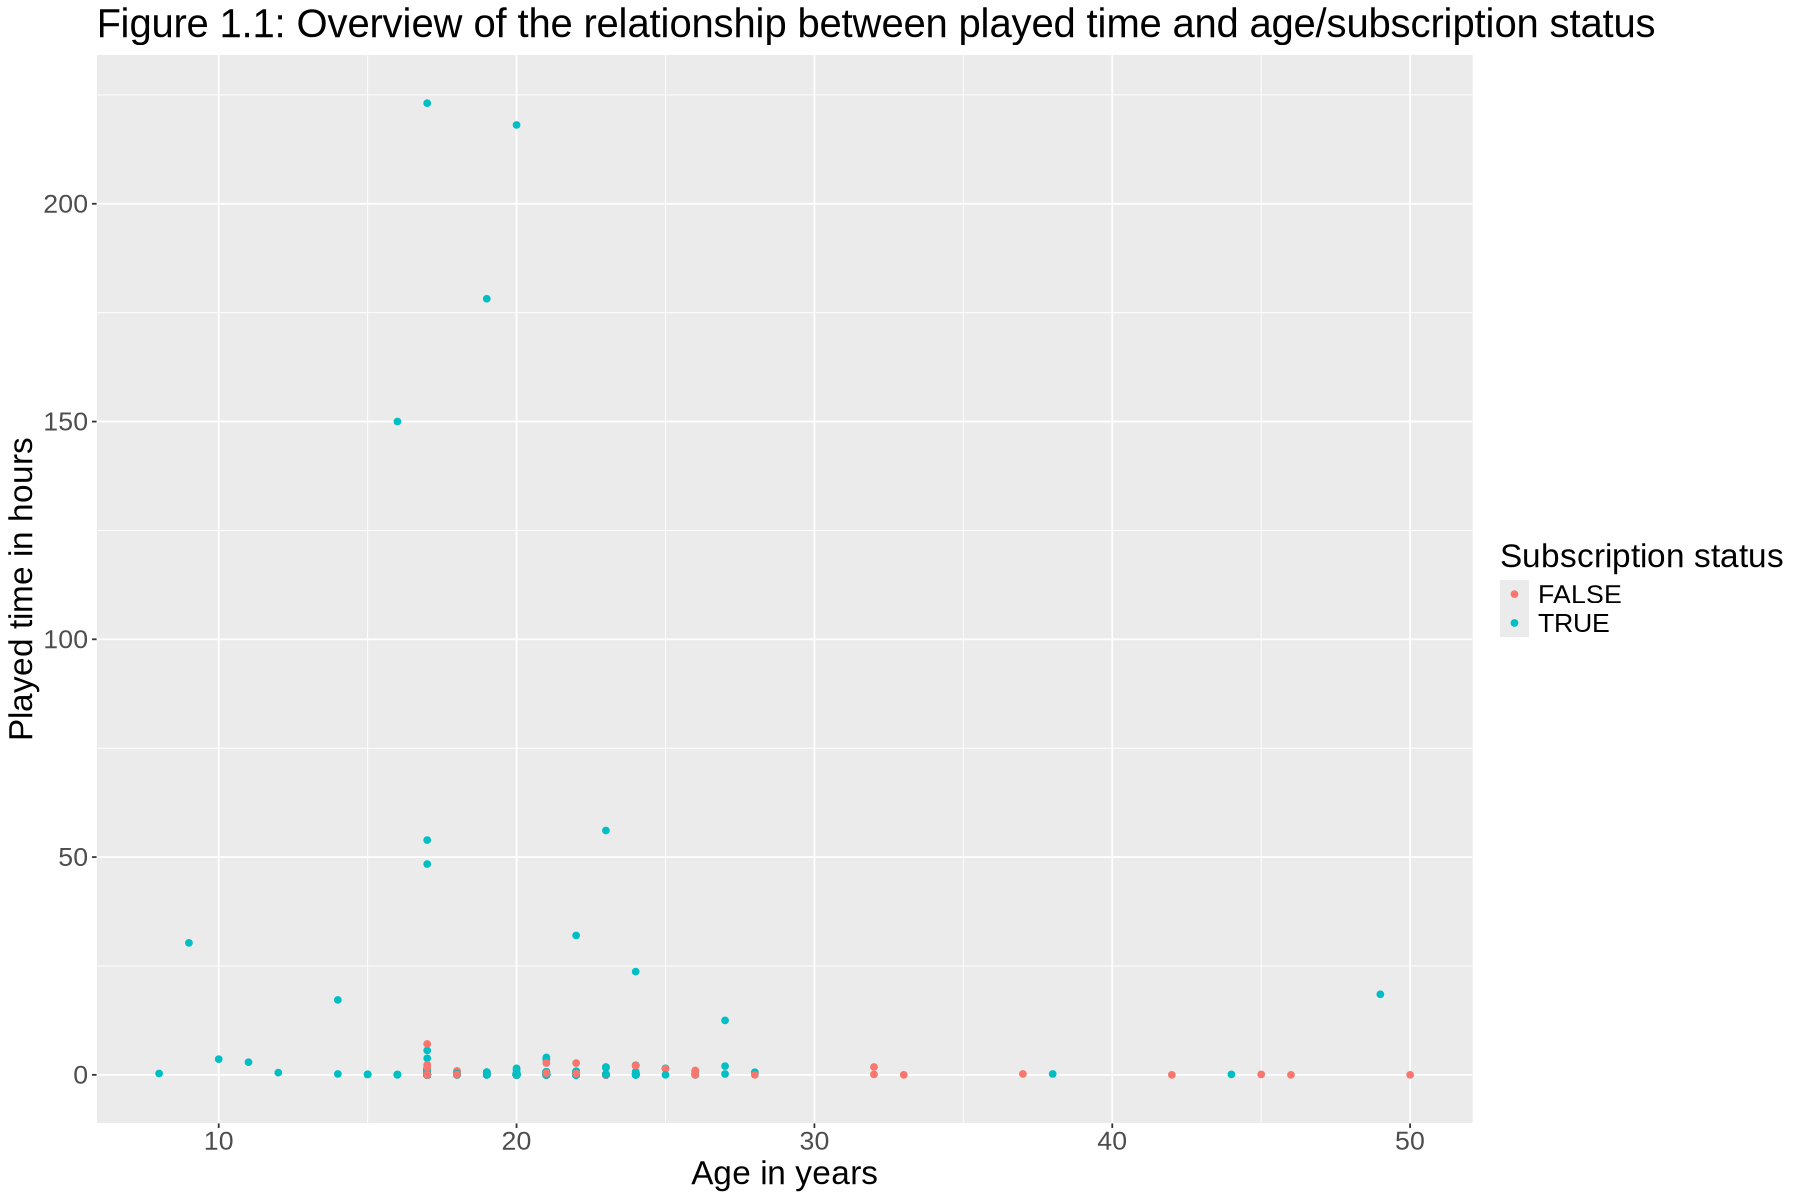

In [21]:
options(repr.plot.width = 15, repr.plot.height = 10)
players_plot <- players |>
    ggplot(aes(x = Age, y = played_hours)) + 
        geom_point(aes(colour = subscribe)) +
        labs(title = "Figure 1.1: Overview of the relationship between played time and age/subscription status",x = "Age in years", y = "Played time in hours", colour = "Subscription status") +
        theme(text = element_text(size=20))
players_plot

#### Explanation of the visualization:
XXX

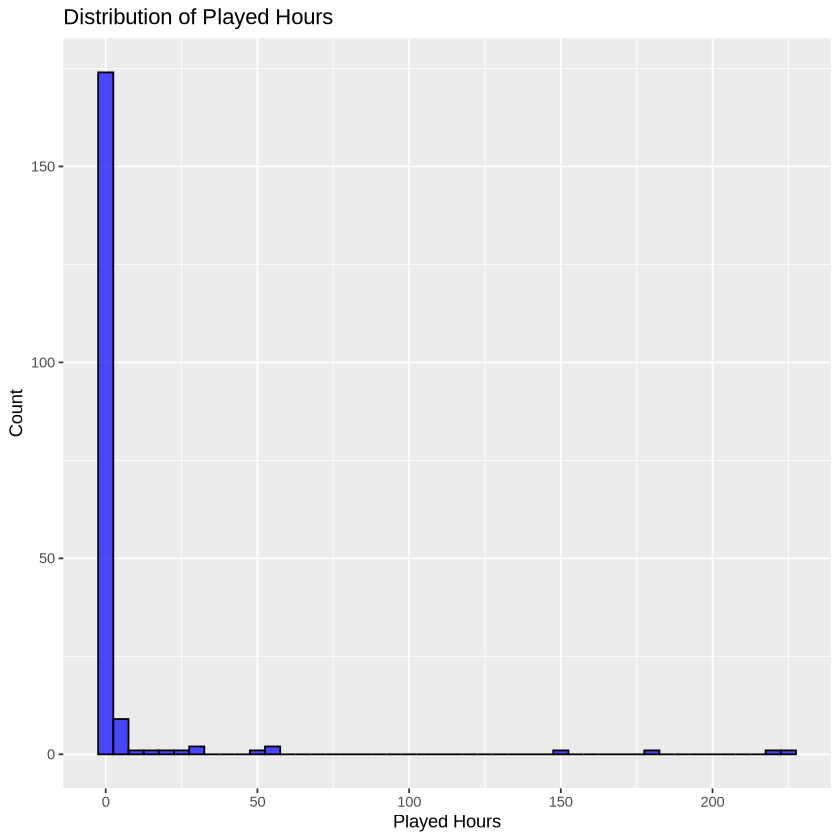

In [42]:
ggplot(players, aes(x = played_hours)) +
  geom_histogram(binwidth = 5, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Figure 1.2Distribution of Played Hours", x = "Played Hours", y = "Count")

#### Explanation of the visualization:
XXX

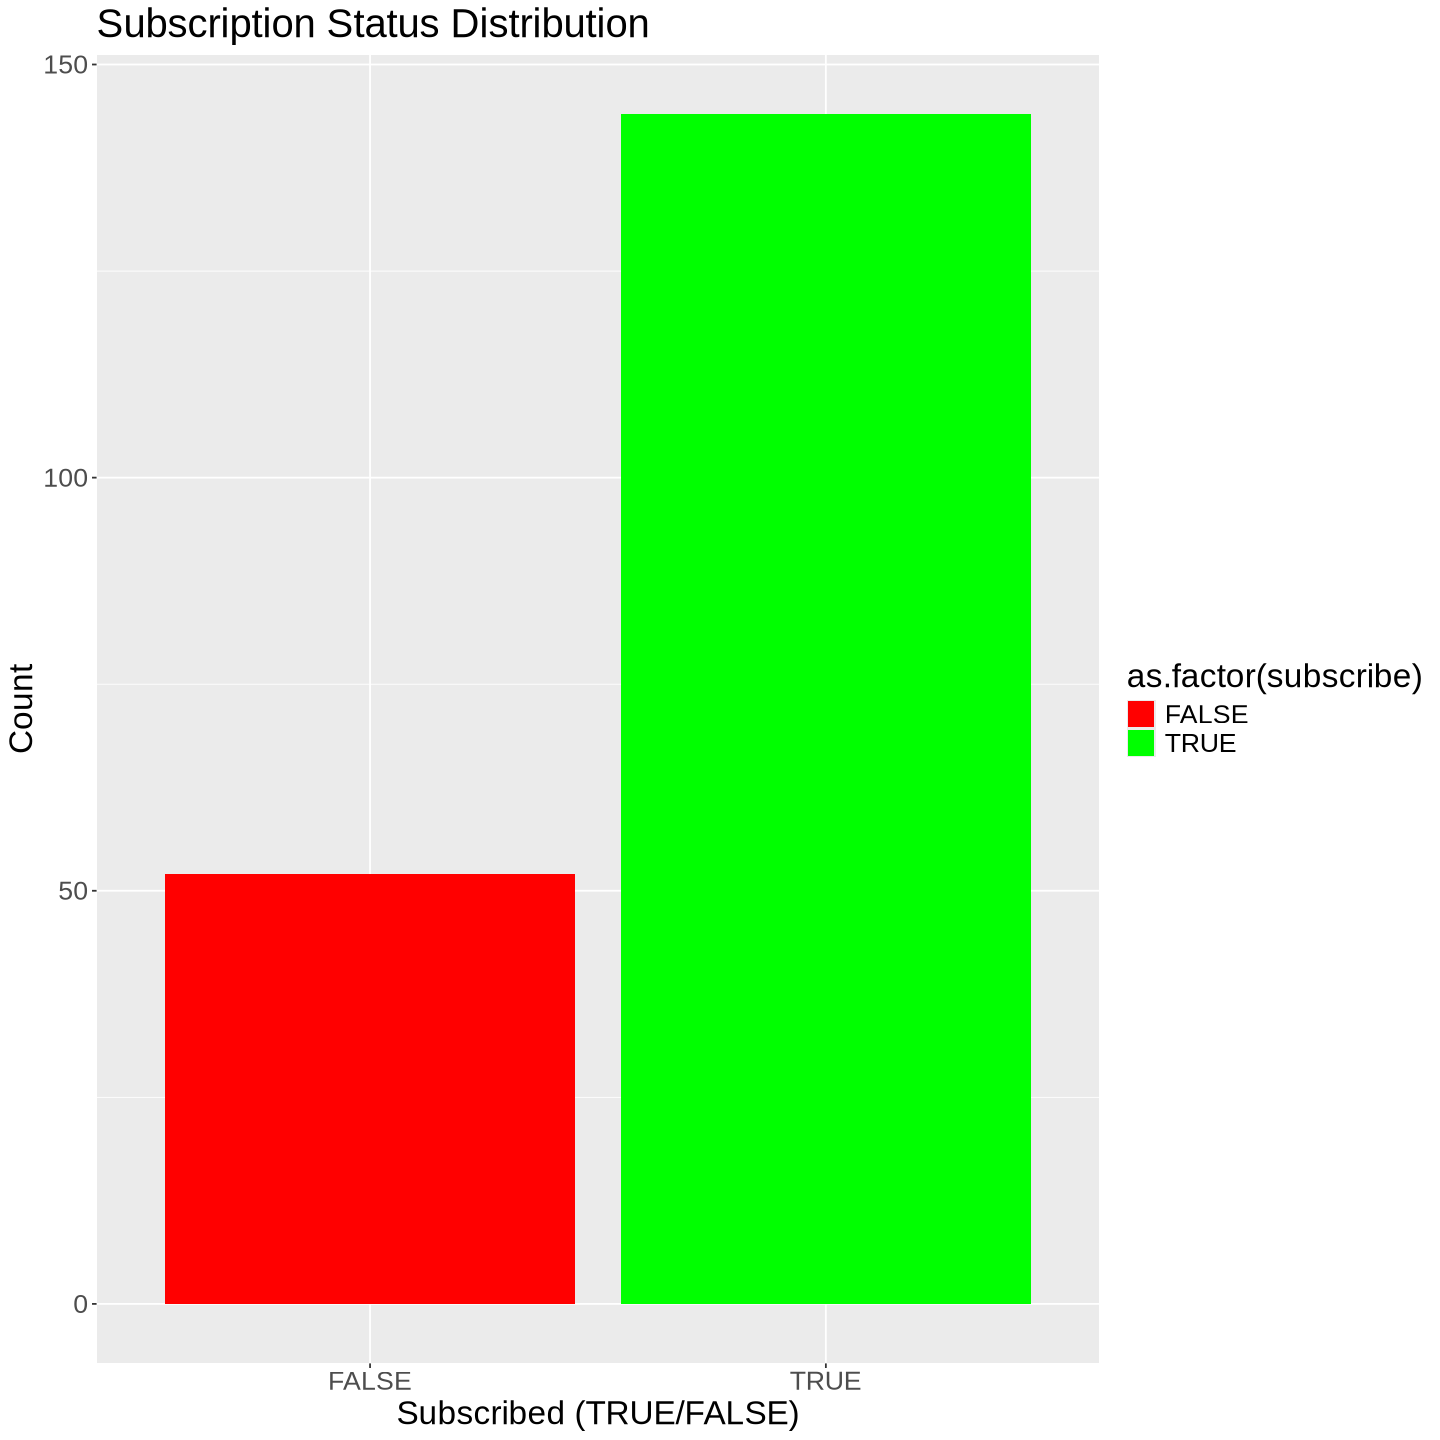

In [24]:
ggplot(players, aes(x = as.factor(subscribe), fill = as.factor(subscribe))) +
  geom_bar() +
  labs(title = "Subscription Status Distribution", x = "Subscribed (TRUE/FALSE)", y = "Count") +
  scale_fill_manual(values = c("red", "green")) +
  theme(text = element_text(size=20))

#### Explanation of the visualization:
XXX

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


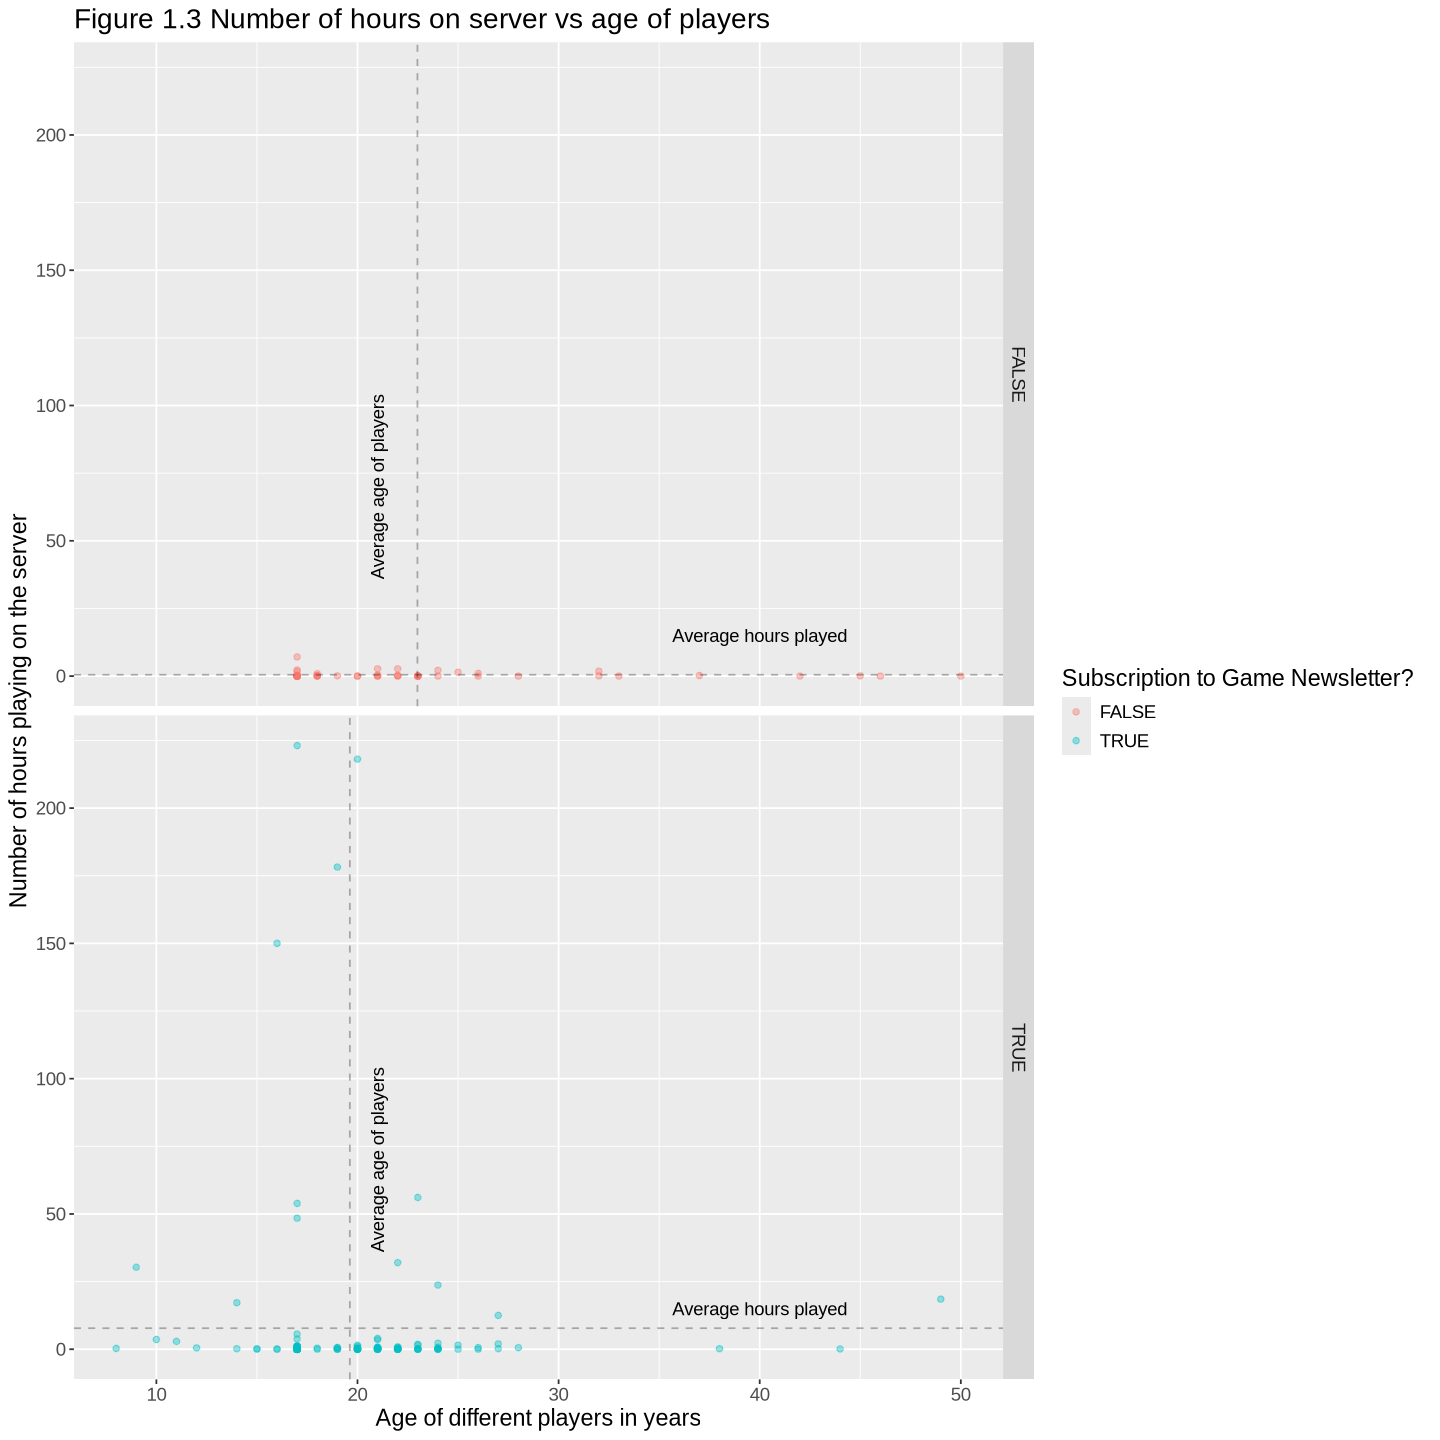

In [25]:
options(repr.plot.width = 12, repr.plot.height = 12)

average_age <- players |>
                select(subscribe, Age) |>
                group_by(subscribe) |>
                summarize(mean=mean(Age, na.rm=TRUE))

average_age_false <- pull(average_age) |> first()
average_age_true <- pull(average_age) |> last()

average_played_hours <- players |>
                        select(subscribe, played_hours) |>
                        group_by(subscribe) |>
                        summarize(mean=mean(played_hours, na.rm=TRUE))

average_played_hours_false <- pull(average_played_hours) |> first()
average_played_hours_true <- pull(average_played_hours) |> last()

played_hours_vs_age_plot <- ggplot(players, aes(x=Age ,y=played_hours,color=as_factor(subscribe))) +
                            geom_point(alpha=0.4) +
                            facet_grid(row=vars(subscribe)) +
                            labs(x="Age of different players in years",
                                y="Number of hours playing on the server",
                                title="Figure 1.3 Number of hours on server vs age of players",
                                color="Subscription to Game Newsletter?") +
                            theme(text=element_text(size=14)) +
                            geom_vline(aes(xintercept=average_age_false), linetype="dashed", data=filter(players, subscribe == FALSE), alpha=0.3) +
                            geom_vline(aes(xintercept=average_age_true), linetype="dashed", data=filter(players, subscribe == TRUE), alpha=0.3) +
                            geom_hline(aes(yintercept=average_played_hours_false), linetype="dashed", data=filter(players, subscribe == FALSE), alpha=0.3) +
                            geom_hline(aes(yintercept=average_played_hours_true), linetype="dashed", data=filter(players, subscribe == TRUE), alpha=0.3) +
                            annotate("text", x=21, y=70, label="Average age of players", angle=90) +
                            annotate("text", x=40, y=15, label="Average hours played")


played_hours_vs_age_plot



#### Explanation of the visualization:
XXX

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


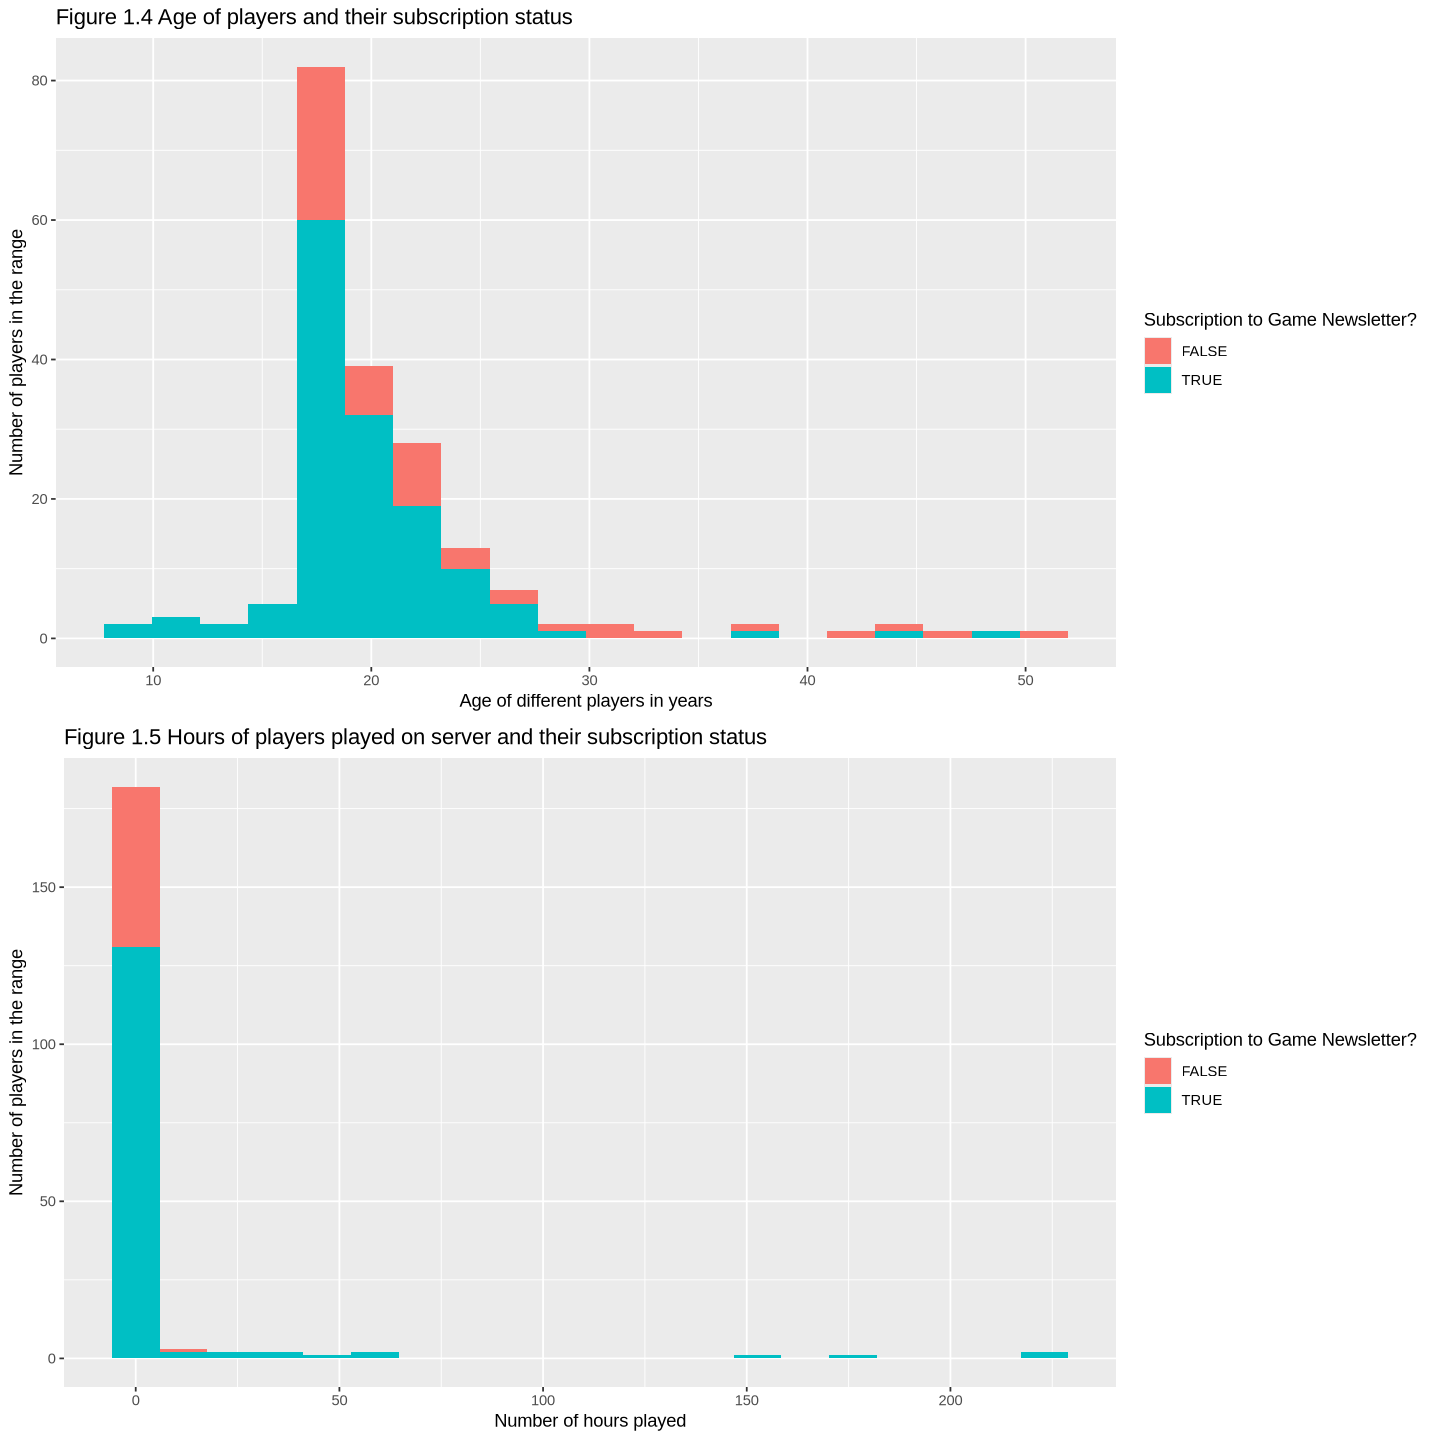

In [27]:
library(cowplot)

age_hist <- ggplot(players, aes(x=Age, fill = as_factor(subscribe))) +
                geom_histogram(bins=20) +
                labs(x="Age of different players in years",
                     y="Number of players in the range",
                    fill="Subscription to Game Newsletter?",
                    title = "Figure 1.4 Age of players and their subscription status")

played_hours_hist <- ggplot(players, aes(x=played_hours, fill = as_factor(subscribe))) +
                geom_histogram(bins=20) +
                labs(x="Number of hours played",
                     y="Number of players in the range",
                    fill="Subscription to Game Newsletter?",
                    title = "Figure 1.5 Hours of players played on server and their subscription status")

plot_grid(age_hist, played_hours_hist, ncol=1)

#### Explanation of the visualization:
XXX

## Data Analysis

### Methods
XXX <br>
XXX <br>
XXX

In [ ]:
## analysis code here for k-nn classifiers

### Results from the predictive analysis

### Visualizations of the predictive analysis

## Final Discussions and concluding thoughts

- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?